# Importar Bibliotecas Necesarias
En esta celda importamos las bibliotecas necesarias para manejar datos en JSON, realizar solicitudes a la API, y trabajar con rutas de archivos y bases de datos SQLite.



In [2]:
# Importar Bibliotecas Necesarias
import json  # Biblioteca para trabajar con archivos JSON
import pandas as pd  # Biblioteca para manipulación y análisis de datos
import requests
import json
import os
import sqlite3
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from textblob import TextBlob
import string

from nltk.corpus import stopwords
local_path = os.getcwd()
save_path = local_path+ r"\NewsAPI.json"
DB_path = local_path+ r"\NewsAPI.db"
images_path = local_path + r'\Visualizaciones' # Ruta donde se guardarán las imágenes generadas

# Extracción
Vamos a conectar con la API de NewsAPI para obtener las noticias más relevantes de Estados Unidos. Después, guardaremos esta información en un archivo JSON local, listo para ser procesado más adelante.

# **¡Atención!** 
Ejecutar este código con demasiada frecuencia puede agotar tu cuota de llamadas a la API, especialmente si estás utilizando una clave gratuita. La mayoría de las APIs tienen límites diarios o mensuales sobre cuántas solicitudes puedes hacer. Asegúrate de no exceder estos límites para evitar bloqueos o suspensiones de tu cuenta. Utiliza el código con moderación y solo cuando sea necesario.

In [10]:
#url = "https://newsapi.org/v2/top-headlines"
params = {
    'country': 'us',  # Change the country as needed
    'apiKey': ''  # Replace this with your key if you regenerate it
}

response = requests.get(url, params=params)
data = response.json()
print(data)


# Crear el directorio si no existe
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Guardar la respuesta en un archivo JSON
with open(save_path, "w") as file:
    json.dump(data, file, indent=4)

print(f"Archivo descargado y guardado como '{save_path}'.")
# Guardar la respuesta en un archivo JSON
with open(save_path, "w") as file:
    json.dump(data, file, indent=4)

NameError: name 'url' is not defined

# Cargar Archivo JSON
En este paso, cargamos el archivo JSON previamente descargado para poder trabajar con los datos. Usamos la función json.load() para leer el contenido del archivo y almacenarlo en una variable data, que ahora contiene toda la información recuperada de la API.

In [3]:
# Cargar el archivo JSON
with open(save_path, 'r') as f:
    data = json.load(f)


# Mostrar Contenido del Archivo JSON
Aquí mandamos una muestra de los primeros 5 elementos del archivo JSON cargado. Utilizamos una comprensión de diccionario para extraer las primeras 5 claves y sus valores, lo que nos permite visualizar rápidamente una parte del contenido sin tener que procesar todo el archivo.



In [4]:
# Mostrar una muestra del contenido del archivo JSON cargado
muestra_datos_json = {k: data[k] for k in list(data)[:5]}  # Obtener los primeros 5 elementos
muestra_datos_json

{'status': 'ok',
 'totalResults': 32,
 'articles': [{'source': {'id': 'the-washington-post',
    'name': 'The Washington Post'},
   'author': 'Ian Livingston',
   'title': 'D.C.-area forecast: Cold this weekend ahead of snow arriving Sunday night - The Washington Post',
   'description': 'The first sizable winter storm of the season is targeting the region.',
   'url': 'https://www.washingtonpost.com/weather/2025/01/04/dc-area-forecast-cold-snow/',
   'urlToImage': 'https://www.washingtonpost.com/wp-apps/imrs.php?src=https://arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/7F46XWBJ2JDPDEWIXP47GV25XA.jpg&w=1440',
   'publishedAt': '2025-01-04T17:31:27Z',
   'content': 'A somewhat subjective rating of the days weather, on a scale of 0 to 10.\r\n5/10: Fairly unremarkable for January. Cold but sun filled.\r\n<ul><li>Today: Mostly to partly sunny. Gusty. Highs: Near 30 to … [+2270 chars]'},
  {'source': {'id': None, 'name': '[Removed]'},
   'author': None,
   'title': '[Removed

En este fragmento, estamos explorando la estructura del archivo JSON cargado. Primero, mostramos las claves principales del objeto JSON utilizando data.keys(). Luego, accedemos a algunas de las claves específicas como 'status', 'totalResults' y 'articles', que nos proporcionan información sobre el estado de la respuesta, el número total de artículos disponibles y, finalmente, los artículos en sí.



In [5]:
data.keys()

print (data['status'])
print (data['totalResults'])
print (data['articles'])

ok
32
[{'source': {'id': 'the-washington-post', 'name': 'The Washington Post'}, 'author': 'Ian Livingston', 'title': 'D.C.-area forecast: Cold this weekend ahead of snow arriving Sunday night - The Washington Post', 'description': 'The first sizable winter storm of the season is targeting the region.', 'url': 'https://www.washingtonpost.com/weather/2025/01/04/dc-area-forecast-cold-snow/', 'urlToImage': 'https://www.washingtonpost.com/wp-apps/imrs.php?src=https://arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/7F46XWBJ2JDPDEWIXP47GV25XA.jpg&w=1440', 'publishedAt': '2025-01-04T17:31:27Z', 'content': 'A somewhat subjective rating of the days weather, on a scale of 0 to 10.\r\n5/10: Fairly unremarkable for January. Cold but sun filled.\r\n<ul><li>Today: Mostly to partly sunny. Gusty. Highs: Near 30 to … [+2270 chars]'}, {'source': {'id': None, 'name': '[Removed]'}, 'author': None, 'title': '[Removed]', 'description': '[Removed]', 'url': 'https://removed.com', 'urlToImage': No

Ahora, extraemos la lista de artículos del archivo JSON y la convertimos en un DataFrame utilizando pandas. Esto nos permite organizar y visualizar los datos de manera estructurada, facilitando su análisis posterior. Finalmente, mostramos las primeras filas del DataFrame para obtener una vista preliminar de los datos.

In [6]:
# Extraer los artículos
articles = data['articles']

# Crear un DataFrame a partir de la lista de artículos
df = pd.DataFrame(articles)

# Mostrar las primeras filas del DataFrame
df.head(1)

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'the-washington-post', 'name': 'The Was...",Ian Livingston,D.C.-area forecast: Cold this weekend ahead of...,The first sizable winter storm of the season i...,https://www.washingtonpost.com/weather/2025/01...,https://www.washingtonpost.com/wp-apps/imrs.ph...,2025-01-04T17:31:27Z,A somewhat subjective rating of the days weath...


# Visualizar Datos del JSON

En este paso, iteramos sobre la lista de artículos para extraer y aplanar los datos de cada artículo. Esto incluye información como el identificador y nombre de la fuente, el autor, título, descripción, URL, imagen, fecha de publicación y contenido. Posteriormente, almacenamos estos datos aplanados en una lista y la convertimos en un DataFrame de pandas, donde las columnas están organizadas como un MultiIndex para representar las jerarquías en los datos.



In [7]:
# Lista de artículos
articles = data['articles']

# Crear una lista para almacenar los datos aplanados
df = []

# Iterar sobre cada artículo en la lista
for article in articles:
    # Extraer los datos de cada artículo
    ciudad_data = {
        ('source', 'id'): article['source']['id'] if 'source' in article else None,
        ('source', 'name'): article['source']['name'] if 'source' in article else None,
        ('author', '_'): article['author'],
        ('title', '_'): article['title'],
        ('description', '_'): article['description'],
        ('url', '_'): article['url'],
        ('urlToImage', '_'): article['urlToImage'],
        ('publishedAt', '_'): article['publishedAt'],
        ('content', '_'): article['content']
    }
    
    # Agregar los datos del artículo a la lista
    df.append(ciudad_data)

# Crear un DataFrame a partir de la lista de datos aplanados
df_noticias = pd.DataFrame(df)

# Asegurarse de que las columnas sean de tipo MultiIndex
df_noticias.columns = pd.MultiIndex.from_tuples(df_noticias.columns)

# Mostrar el DataFrame resultante
df_noticias.head()

source                               author  \
                    id                 name               _   
0  the-washington-post  The Washington Post  Ian Livingston   
1                 None            [Removed]            None   
2                 espn                 ESPN  Mark Schlabach   
3                 None             Heat.com       Bulls.com   
4                 None              Variety   J. Kim Murphy   

                                               title  \
                                                   _   
0  D.C.-area forecast: Cold this weekend ahead of...   
1                                          [Removed]   
2  Father of UGA's Smart dies after Sugar Bowl fa...   
3  Bulls to Retire Derrick Rose's No. 1 Jersey - ...   
4  Box Office: ‘Mufasa’ Climbs Above ‘Sonic 3’ to...   

                                         description  \
                                                   _   
0  The first sizable winter storm of the season i...   
1                                          [Removed]   
2  Georgia coach Kirby Smart's father, Sonny, die...   
3  The jersey retirement ceremony will be held du...   
4  'Mufasa: The Lion King' had to wait to be king...   

                                                 url  \
                                                   _   
0  https://www.washingtonpost.com/weather/2025/01...   
1                                https://removed.com   
2  https://www.espn.com/college-football/story/_/...   
3  https://www.nba.com/bulls/news/bulls-to-retire...   
4  https://variety.com/2025/film/box-office/box-o...   

                                          urlToImage           publishedAt  \
                                                   _                     _   
0  https://www.washingtonpost.com/wp-apps/imrs.ph...  2025-01-04T17:31:27Z   
1                                               None  2025-01-04T17:21:00Z   
2  https://a.espncdn.com/combiner/i?img=%2Fphoto%...  2025-01-04T17:00:00Z   
3  https://cdn.nba.com/teams/uploads/sites/161061...  2025-01-04T16:58:55Z   
4  https://variety.com/wp-content/uploads/2025/01...  2025-01-04T16:30:00Z   

                                             content  
                                                   _  
0  A somewhat subjective rating of the days weath...  
1                                          [Removed]  
2  Georgia coach Kirby Smart's father, Sonny, die...  
3                                               None  
4  The holiday box office is winding down this we...

# Exploración
## Tabla de noticias 
Verifica los tipos de datos de las columnas del DataFrame df_noticias para asegurarse de que todos los datos estén correctamente asignados. Es especialmente importante con un MultiIndex, ya que se maneja en niveles

In [8]:
print(df_noticias.dtypes)

source       id      object
             name    object
author       _       object
title        _       object
description  _       object
url          _       object
urlToImage   _       object
publishedAt  _       object
content      _       object
dtype: object


El DataFrame df_noticias contiene los datos aplanados de los artículos obtenidos de la API de noticias. Cada columna está estructurada con un MultiIndex, lo que permite representar las jerarquías de los datos como el origen del artículo, el autor y el contenido.

In [9]:
df_noticias


source                       \
                     id                 name   
0   the-washington-post  The Washington Post   
1                  None            [Removed]   
2                  espn                 ESPN   
3                  None             Heat.com   
4                  None              Variety   
5      associated-press     Associated Press   
6                  None               PEOPLE   
7                  None              Variety   
8                  None           CBS Sports   
9   the-washington-post  The Washington Post   
10             the-hill             The Hill   
11                 None           PhoneArena   
12                 None       Whitehouse.gov   
13                 None              Vulture   
14                 None      Hindustan Times   
15                 None            hays Post   
16             politico             Politico   
17                  cnn                  CNN   
18                 None            [Removed]   
19                 None             BBC News   

                                author  \
                                     _   
0                       Ian Livingston   
1                                 None   
2                       Mark Schlabach   
3                            Bulls.com   
4                        J. Kim Murphy   
5                          MATTHEW LEE   
6   https://www.facebook.com/peoplemag   
7                           Brent Lang   
8                                        
9                     Matthew Cappucci   
10                     Ashleigh Fields   
11                       Abdullah Asim   
12                     The White House   
13                          Nate Jones   
14                                  AP   
15                                None   
16                        Rachael Bade   
17             Jamie Barton, Jacob Lev   
18                                None   
19                                None   

                                                title  \
                                                    _   
0   D.C.-area forecast: Cold this weekend ahead of...   
1                                           [Removed]   
2   Father of UGA's Smart dies after Sugar Bowl fa...   
3   Bulls to Retire Derrick Rose's No. 1 Jersey - ...   
4   Box Office: ‘Mufasa’ Climbs Above ‘Sonic 3’ to...   
5   Congress is notified by the Biden administrati...   
6   Why Pamela Anderson Goes Makeup-Free in 'The L...   
7   Jeff Baena, Indie Director and Aubrey Plaza’s ...   
8   Week 18 NFL games with playoff implications: R...   
9   What to know about the heavy snow and ice stor...   
10  Surgeon general’s warning sends alcohol stocks...   
11  Leaked Galaxy S25 Ultra photo shows off rounde...   
12  President Biden Announces Recipients of the Pr...   
13         Don’t Underestimate Emilia Pérez - Vulture   
14  Jimmy Carter's six days state funeral begins i...   
15  Sick season is in full force in Kan. What the ...   
16  How Mike Johnson (and Donald Trump) did it - P...   
17  Miami Heat suspend Jimmy Butler for seven game...   
18                                          [Removed]   
19  Tomiko Itooka: World's oldest person dies aged...   

                                          description  \
                                                    _   
0   The first sizable winter storm of the season i...   
1                                           [Removed]   
2   Georgia coach Kirby Smart's father, Sonny, die...   
3   The jersey retirement ceremony will be held du...   
4   'Mufasa: The Lion King' had to wait to be king...   
5   The State Department has informed Congress of ...   
6   Pamela Anderson, who often chooses not to wear...   
7   Jeff Baena, an indie filmmaker whose credits i...   
8   Ranking the Week 18 games that matter in terms...   
9   The wintry wallop comes as a blast of Arctic a...   
10  Spirit companies saw stock prices plummet Frid...   
11  A new leaked photo of the upcoming 

Usamos df_noticias.info() para obtener un resumen del DataFrame, incluyendo el número de entradas no nulas por columna. 

A continuación, con df_noticias.isnull().sum(), verificamos la cantidad de valores nulos en cada columna, lo que nos ayuda a identificar posibles datos faltantes que pueden requerir limpieza o manejo.

In [10]:
df_noticias.info()
print(df_noticias.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   (source, id)      7 non-null      object
 1   (source, name)    20 non-null     object
 2   (author, _)       16 non-null     object
 3   (title, _)        20 non-null     object
 4   (description, _)  20 non-null     object
 5   (url, _)          20 non-null     object
 6   (urlToImage, _)   18 non-null     object
 7   (publishedAt, _)  20 non-null     object
 8   (content, _)      19 non-null     object
dtypes: object(9)
memory usage: 1.5+ KB
source       id      13
             name     0
author       _        4
title        _        0
description  _        0
url          _        0
urlToImage   _        2
publishedAt  _        0
content      _        1
dtype: int64


Se aplana el MultiIndex del DataFrame df_noticias para que las columnas se representen como una sola cadena, facilitando su acceso. Luego, creamos un nuevo DataFrame new_df seleccionando solo las columnas sourceid y sourcename, eliminando los valores duplicados con drop_duplicates() para obtener una lista única de fuentes de noticias.

In [11]:
# Aplanar el MultiIndex
df_noticias.columns = [''.join(col).strip() for col in df_noticias.columns]

# Crear un nuevo DataFrame con las columnas aplanadas
new_df = df_noticias[['sourceid', 'sourcename']].drop_duplicates()

print(df_noticias.columns)
new_df

Index(['sourceid', 'sourcename', 'author_', 'title_', 'description_', 'url_',
       'urlToImage_', 'publishedAt_', 'content_'],
      dtype='object')


,sourceid,sourcename
0,the-washington-post,The Washington Post
1,None,[Removed]
2,espn,ESPN
3,None,Heat.com
4,None,Variety
5,associated-press,Associated Press
6,None,PEOPLE
8,None,CBS Sports
10,the-hill,The Hill
11,None,PhoneArena


# Transformación y Limpieza

Se realiza una limpieza y transformación de datos en el DataFrame df_noticias. Primero, se llenan los valores None en la columna sourceid con el valor de sourcename, convertido a minúsculas y con los espacios reemplazados por guiones bajos. 


Luego, se eliminan las filas en las que el título contiene '[Removed]'. Además, se rellenan los valores vacíos o None en la columna content_ para aquellos artículos cuyo autor es 'Bulls.com', asignando un texto predefinido. Finalmente, se convierte la columna publishedAt_ a un formato de fecha.

In [12]:
# Llenar los valores None en 'sourceid' con el valor de 'sourcename' en minúsculas y reemplazando los espacios por "_"
df_noticias['sourceid'] = df_noticias['sourceid'].fillna(
    df_noticias['sourcename'].str.lower().str.replace(' ', '_', regex=True)
)

# Eliminar las filas donde 'title_' contenga '[Removed]'
df_noticias = df_noticias[df_noticias['title_'] != '[Removed]']

# Rellenar los valores en 'content_' donde 'author_' sea 'Bulls.com' y 'content_' sea None o vacío
df_noticias['content_'] = df_noticias.apply(
    lambda row: (
        "The Chicago Bulls will retire Derrick Rose's No. 1 jersey in a special ceremony during an upcoming game. "
        "Rose, the youngest player to ever win an MVP award in 2011, made a lasting impact on the team and the city. "
        "Despite injuries that cut his career short, his legacy as a hometown hero and one of the franchise's greatest "
        "players will be honored forever."
    ) if row['author_'] == 'Bulls.com' and pd.isna(row['content_']) else row['content_'], axis=1
)
df_noticias['publishedAt_'] = pd.to_datetime(df_noticias['publishedAt_'])


C:\Users\user\AppData\Local\Temp\ipykernel_72028\1233792927.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noticias['content_'] = df_noticias.apply(
C:\Users\user\AppData\Local\Temp\ipykernel_72028\1233792927.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noticias['publishedAt_'] = pd.to_datetime(df_noticias['publishedAt_'])


Se identifican los registros donde la columna author_ es nula o está vacía, mostrando las URLs correspondientes para revisión. A continuación, se crea un diccionario de mapeo entre el sourceid y el autor correspondiente. Luego, se rellenan los valores vacíos o nulos de author_ utilizando este diccionario. Finalmente, se verifican los cambios realizados en los tipos de datos y se muestra el DataFrame actualizado.

In [13]:
print(df_noticias[df_noticias['author_'].isnull() | (df_noticias['author_'] == '')]['url_'])
# Crear un diccionario de mapeo para 'sourceid' a 'author_'
author_mapping = {
    'cbs_sports': 'Jeff Kerr',
    'hays_post': 'MIKE STOBBE',
    'bbc_news': 'Comerford'
}

# Llenar los valores vacíos o None en 'author_' según 'sourceid_'
df_noticias['author_'] = df_noticias.apply(
    lambda row: author_mapping.get(row['sourceid'], row['author_']) 
    if pd.isnull(row['author_']) or row['author_'] == '' else row['author_'],
    axis=1
)

# Verificar los cambios realizados
print (df_noticias.dtypes)
df_noticias



8     https://www.cbssports.com/nfl/news/week-18-nfl...
15    https://hayspost.com/posts/52d9e594-2a9b-446d-...
19       https://www.bbc.com/news/articles/c9830vpp2p0o
Name: url_, dtype: object
sourceid                     object
sourcename                   object
author_                      object
title_                       object
description_                 object
url_                         object
urlToImage_                  object
publishedAt_    datetime64[ns, UTC]
content_                     object
dtype: object


C:\Users\user\AppData\Local\Temp\ipykernel_72028\453601384.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noticias['author_'] = df_noticias.apply(


,sourceid,sourcename,author_,title_,description_,url_,urlToImage_,publishedAt_,content_
0,the-washington-post,The Washington Post,Ian Livingston,D.C.-area forecast: Cold this weekend ahead of...,The first sizable winter storm of the season i...,https://www.washingtonpost.com/weather/2025/01...,https://www.washingtonpost.com/wp-apps/imrs.ph...,2025-01-04 17:31:27+00:00,A somewhat subjective rating of the days weath...
2,espn,ESPN,Mark Schlabach,Father of UGA's Smart dies after Sugar Bowl fa...,"Georgia coach Kirby Smart's father, Sonny, die...",https://www.espn.com/college-football/story/_/...,https://a.espncdn.com/combiner/i?img=%2Fphoto%...,2025-01-04 17:00:00+00:00,"Georgia coach Kirby Smart's father, Sonny, die..."
3,heat.com,Heat.com,Bulls.com,Bulls to Retire Derrick Rose's No. 1 Jersey - ...,The jersey retirement ceremony will be held du...,https://www.nba.com/bulls/news/bulls-to-retire...,https://cdn.nba.com/teams/uploads/sites/161061...,2025-01-04 16:58:55+00:00,The Chicago Bulls will retire Derrick Rose's N...
4,variety,Variety,J. Kim Murphy,Box Office: ‘Mufasa’ Climbs Above ‘Sonic 3’ to...,'Mufasa: The Lion King' had to wait to be king...,https://variety.com/2025/film/box-office/box-o...,https://variety.com/wp-content/uploads/2025/01...,2025-01-04 16:30:00+00:00,The holiday box office is winding down this we...
5,associated-press,Associated Press,MATTHEW LEE,Congress is notified by the Biden administrati...,The State Department has informed Congress of ...,https://apnews.com/article/israel-arms-sale-ga...,https://dims.apnews.com/dims4/default/f49b7bc/...,2025-01-04 15:17:00+00:00,WASHINGTON (AP) The State Department has infor...
6,people,PEOPLE,https://www.facebook.com/peoplemag,Why Pamela Anderson Goes Makeup-Free in 'The L...,"Pamela Anderson, who often chooses not to wear...",https://people.com/why-pamela-anderson-makeup-...,https://people.com/thmb/25XOlcbhAVvDY3oIlKJmVm...,2025-01-04 15:00:00+00:00,Pamela Anderson often chooses not to wear make...
7,variety,Variety,Brent Lang,"Jeff Baena, Indie Director and Aubrey Plaza’s ...","Jeff Baena, an indie filmmaker whose credits i...",https://variety.com/2025/film/news/jeff-baena-...,https://variety.com/wp-content/uploads/2025/01...,2025-01-04 14:50:00+00:00,"Jeff Baena, a screenwriter and director whose ..."
8,cbs_sports,CBS Sports,Jeff Kerr,Week 18 NFL games with playoff implications: R...,Ranking the Week 18 games that matter in terms...,https://www.cbssports.com/nfl/news/week-18-nfl...,https://sportshub.cbsistatic.com/i/r/2024/12/3...,2025-01-04 14:42:56+00:00,The final week of the NFL season typically has...
9,the-washington-post,The Washington Post,Matthew Cappucci,What to know about the heavy snow and ice stor...,The wintry wallop comes as a blast of Arctic a...,https://www.washingtonpost.com/weather/2025/01...,https://www.washingtonpost.com/wp-apps/imrs.ph...,2025-01-04 14:18:56+00:00,"A major winter storm is about to trek 1,500 mi..."
10,the-hill,The Hill,Ashleigh Fields,Surgeon general’s warning sends alcohol stocks...,Spirit companies saw stock prices plummet Frid...,https://thehill.com/business/5067036-alcohol-s...,https://thehill.com/wp-content/uploads/sites/2...,2025-01-04 13:43:00+00:00,Skip to content\r\nSpirit companies saw stock ...


# Conclusión

La idea de agregar una tabla índice al df_weather no es viable debido a la estructura actual del DataFrame, lo que podría generar complicaciones en la integración y análisis de los datos. A pesar de la posibilidad de aplanar los datos, la complejidad de los mismos hace que la implementación de un índice adicional no sea efectiva o necesaria.

# Revisión de tabla final

Verificaremos la estructura de los datos garantizando que cada columna esté en el formato adecuado para el análisis y procesamiento posteriores

In [14]:
print("df_noticias :", df_noticias.dtypes)

df_noticias : sourceid                     object
sourcename                   object
author_                      object
title_                       object
description_                 object
url_                         object
urlToImage_                  object
publishedAt_    datetime64[ns, UTC]
content_                     object
dtype: object


# Escritura en tablas de BD
Este bloque de código establece una conexión a una base de datos SQLite y luego inserta los datos del DataFrame df_noticias en una tabla llamada df_noticias. Utiliza la opción if_exists='append' para agregar los nuevos datos sin sobrescribir los existentes, y finalmente, confirma los cambios y cierra la conexión a la base de datos.

In [15]:
# Conectar a la base de datos de NewsAPI
conn = sqlite3.connect(DB_path)

# Inserción de datos del DataFrame df_noticias en la tabla df_noticias
df_noticias.to_sql('df_noticias', conn, if_exists='replace', index=False)

# Confirmar los cambios y cerrar la conexión
conn.commit()

# Revisión de escritura en BD

A continuación, se ejecutará una consulta SQL para extraer todos los registros almacenados en la tabla df_noticias de la base de datos SQLite newsapi.db. La consulta seleccionará todos los campos de la tabla, y luego los resultados se cargarán en un DataFrame utilizando Pandas. Finalmente, se mostrarán las primeras filas para validar la correcta carga de los datos.



In [16]:
# Consulta SQL para obtener todos los registros de la tabla 'prediccion'
query_1 = "SELECT * FROM df_noticias"

# Ejecutar la consulta y cargar los resultados en un DataFrame
df_noticias_sql = pd.read_sql_query(query_1, conn)

# Mostrar los primeros registros
print(df_noticias_sql)

conn.close()

               sourceid           sourcename  \
0   the-washington-post  The Washington Post   
1                  espn                 ESPN   
2              heat.com             Heat.com   
3               variety              Variety   
4      associated-press     Associated Press   
5                people               PEOPLE   
6               variety              Variety   
7            cbs_sports           CBS Sports   
8   the-washington-post  The Washington Post   
9              the-hill             The Hill   
10           phonearena           PhoneArena   
11       whitehouse.gov       Whitehouse.gov   
12              vulture              Vulture   
13      hindustan_times      Hindustan Times   
14            hays_post            hays Post   
15             politico             Politico   
16                  cnn                  CNN   
17             bbc_news             BBC News   

                               author_  \
0                       Ian Livingston   
1  

C:\Users\user\AppData\Local\Temp\ipykernel_72028\2473156681.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noticias['cleaned_description'] = df_noticias['description_'].apply(preprocess_text)
C:\Users\user\AppData\Local\Temp\ipykernel_72028\2473156681.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noticias['cleaned_content'] = df_noticias['content_'].apply(preprocess_text)


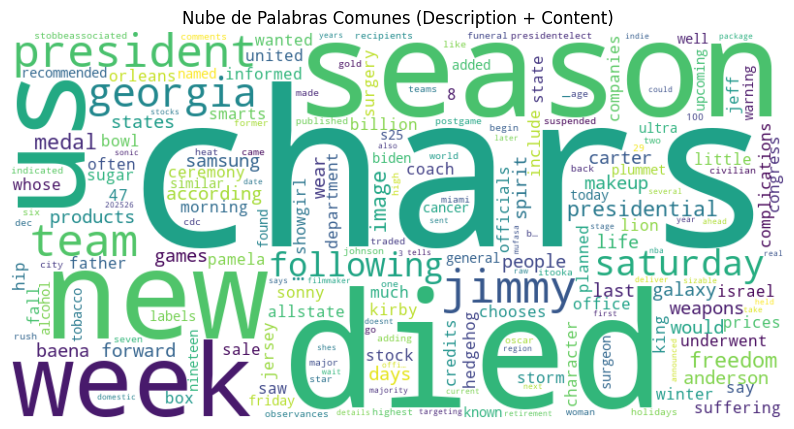

C:\Users\user\AppData\Local\Temp\ipykernel_72028\2473156681.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noticias['description_length'] = df_noticias['description_'].apply(len)
C:\Users\user\AppData\Local\Temp\ipykernel_72028\2473156681.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noticias['content_length'] = df_noticias['content_'].apply(len)


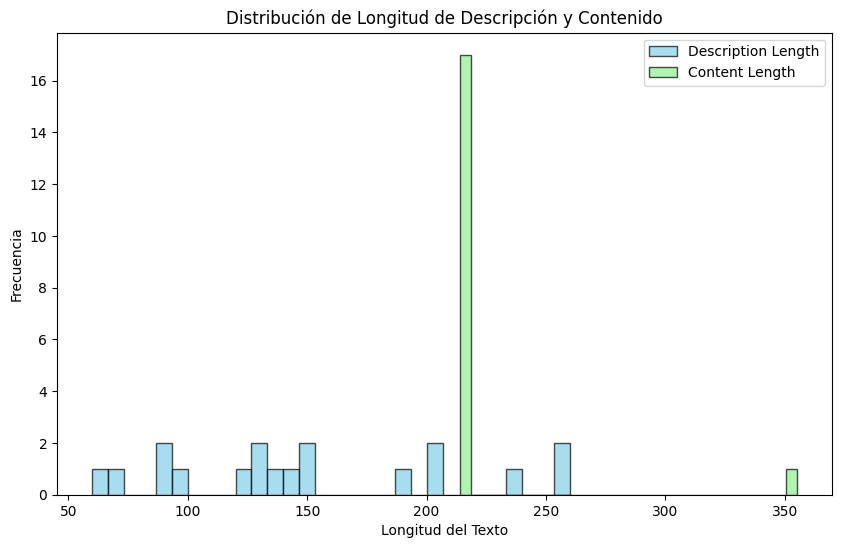

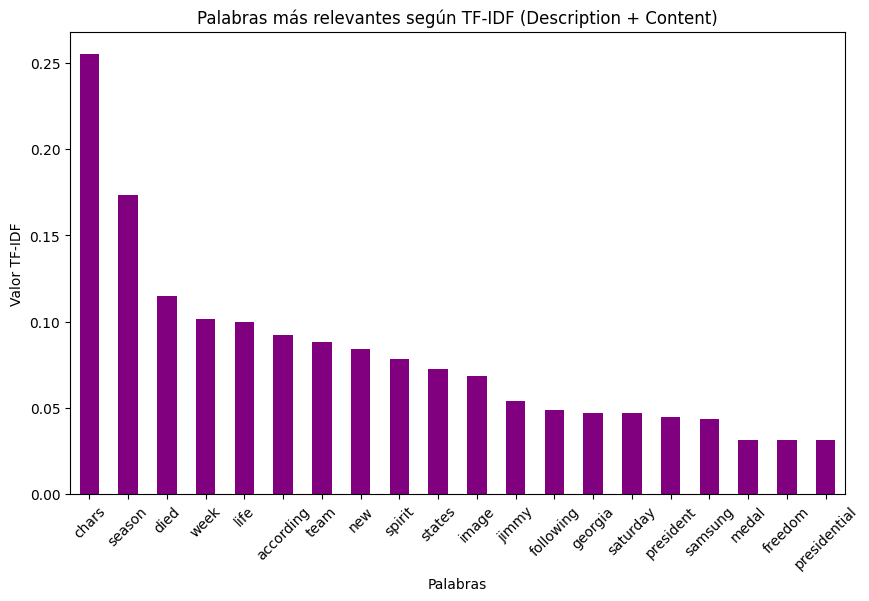

C:\Users\user\AppData\Local\Temp\ipykernel_72028\2473156681.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noticias['description_sentiment'] = df_noticias['cleaned_description'].apply(get_sentiment)
C:\Users\user\AppData\Local\Temp\ipykernel_72028\2473156681.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noticias['content_sentiment'] = df_noticias['cleaned_content'].apply(get_sentiment)


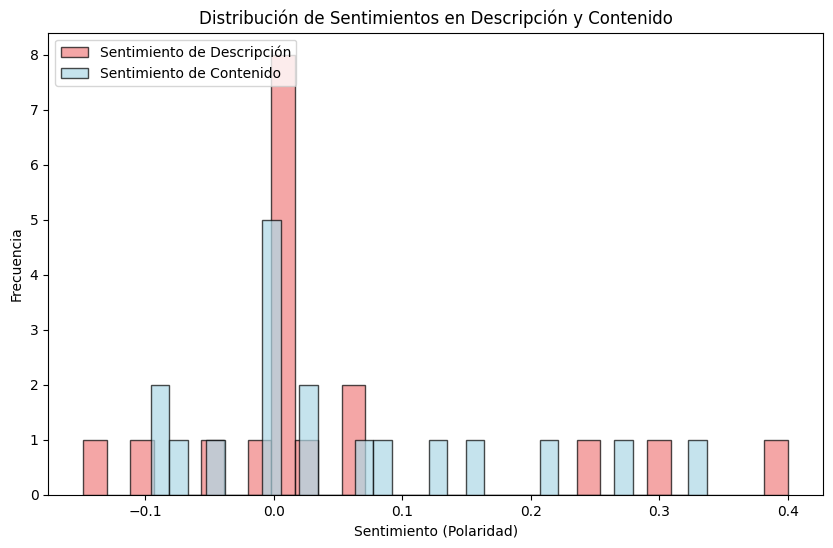

In [17]:

# Asegurarse de que la carpeta para guardar imágenes exista
if not os.path.exists(images_path):
    os.makedirs(images_path)

# Definir una función para preprocesar el texto
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    
    # Eliminar signos de puntuación
    text = ''.join([char for char in text if char not in string.punctuation])
    
    return text

# Preprocesar todos los textos de las columnas 'description_' y 'content_'
df_noticias['cleaned_description'] = df_noticias['description_'].apply(preprocess_text)
df_noticias['cleaned_content'] = df_noticias['content_'].apply(preprocess_text)

# Concatenar todos los textos de las descripciones y contenidos para hacer un solo corpus
all_text = ' '.join(df_noticias['cleaned_description'].dropna()) + ' ' + ' '.join(df_noticias['cleaned_content'].dropna())

# Eliminar las palabras de parada (stopwords) de NLTK
stop_words = set(stopwords.words('english'))

# Crear una lista de palabras (tokens)
words = all_text.split()

# Filtrar las palabras para eliminar las stopwords
filtered_words = [word for word in words if word not in stop_words]

# Contar la frecuencia de las palabras
word_counts = Counter(filtered_words)

# Crear la nube de palabras (WordCloud)
wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate_from_frequencies(word_counts)

# Mostrar y guardar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras Comunes (Description + Content)')
plt.savefig(os.path.join(images_path, 'wordcloud_description_content.png'))  # Guardar imagen
plt.show()

# Calcular la longitud de las descripciones y contenidos
df_noticias['description_length'] = df_noticias['description_'].apply(len)
df_noticias['content_length'] = df_noticias['content_'].apply(len)

# Visualizar la distribución de la longitud de las descripciones y contenidos
plt.figure(figsize=(10, 6))
plt.hist(df_noticias['description_length'], bins=30, alpha=0.7, label='Description Length', color='skyblue', edgecolor='black')
plt.hist(df_noticias['content_length'], bins=30, alpha=0.7, label='Content Length', color='lightgreen', edgecolor='black')
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.title('Distribución de Longitud de Descripción y Contenido')
plt.legend(loc='upper right')
plt.savefig(os.path.join(images_path, 'length_distribution_description_content.png'))  # Guardar imagen
plt.show()

# Usar TF-IDF para obtener las palabras clave
tfidf = TfidfVectorizer(stop_words='english', max_features=20)
tfidf_matrix = tfidf.fit_transform(df_noticias['cleaned_description'].dropna() + ' ' + df_noticias['cleaned_content'].dropna())

# Crear un DataFrame de las palabras más relevantes
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Obtener las palabras más relevantes
top_tfidf_words = tfidf_df.mean(axis=0).sort_values(ascending=False).head(20)

# Visualizar con un gráfico de barras
plt.figure(figsize=(10, 6))  
top_tfidf_words.plot(kind='bar', color='purple')
plt.title('Palabras más relevantes según TF-IDF (Description + Content)')
plt.xlabel('Palabras')
plt.ylabel('Valor TF-IDF')
plt.xticks(rotation=45)
plt.savefig(os.path.join(images_path, 'top_tfidf_words_description_content.png'))  # Guardar imagen
plt.show()

# Función para obtener el sentimiento
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Aplicar análisis de sentimientos en las columnas 'description_' y 'content_'
df_noticias['description_sentiment'] = df_noticias['cleaned_description'].apply(get_sentiment)
df_noticias['content_sentiment'] = df_noticias['cleaned_content'].apply(get_sentiment)

# Visualizar la distribución de los sentimientos en descripciones y contenidos
plt.figure(figsize=(10, 6))
plt.hist(df_noticias['description_sentiment'], bins=30, alpha=0.7, label='Sentimiento de Descripción', color='lightcoral', edgecolor='black')
plt.hist(df_noticias['content_sentiment'], bins=30, alpha=0.7, label='Sentimiento de Contenido', color='lightblue', edgecolor='black')
plt.xlabel('Sentimiento (Polaridad)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Sentimientos en Descripción y Contenido')
plt.legend(loc='upper left')
plt.savefig(os.path.join(images_path, 'sentiment_distribution_description_content.png'))  # Guardar imagen
plt.show()